# Marketing Insights EDA

In this assignment our objective is to obtain insights from the datasets to assist in the marketing of the company. 



In [1]:
#loading the required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Load the datasets
online_sales = pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Marketing insights\\Online_Sales.csv')
customer_data = pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Marketing insights\\CustomersData.xlsx')
discount_coupons = pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Marketing insights\\Discount_Coupon.csv')
marketing_spend= pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Marketing insights\\Marketing_Spend.csv')
tax_amount = pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Marketing insights\\Tax_amount.xlsx')

In [3]:
# Merging datasets using 'CustomerID' as the common key
merged_data = pd.merge(online_sales, customer_data, on='CustomerID', how='left')
merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_name,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12


In [4]:

# Merge datasets using 'Product_Category' as the common key
merged_data = pd.merge(merged_data, discount_coupons, on='Product_Category', how='left')
merged_data = pd.merge(merged_data, tax_amount, on='Product_Category', how='left')



In [5]:
# Convert 'Date' column in the marketing_spend DataFrame to datetime data type
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])
merged_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date'], format='%Y%m%d')

# Merge datasets using 'Transaction_Date' as the common key
merged_data = pd.merge(merged_data, marketing_spend, left_on='Transaction_Date', right_on='Date', how='left')


# Dropping the duplicate 'Date' column if needed
merged_data.drop(columns=['Date'], inplace=True)


In [6]:
#examining the merged dataset
merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_name,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct,GST,Offline_Spend,Online_Spend,Total
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10.0,0.1,4500,2424.5,6924.5
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Feb,ELEC20,20.0,0.1,4500,2424.5,6924.5
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Mar,ELEC30,30.0,0.1,4500,2424.5,6924.5
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Apr,ELEC10,10.0,0.1,4500,2424.5,6924.5
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,May,ELEC20,20.0,0.1,4500,2424.5,6924.5


In [7]:
# Calculating Invoice Value for each transaction in the merged dataset
merged_data['Invoice_Value'] = (
    (merged_data['Quantity'] * merged_data['Avg_Price']) *
    (1 - merged_data['Discount_pct']) *
    (1 + merged_data['GST']) +
    merged_data['Delivery_Charges']
).abs()



In [8]:
# correcting 'Transaction_Date' column


merged_data['Transaction_Date'] = merged_data['Transaction_Date'].dt.strftime('%d-%m-%Y')


print(merged_data[['Transaction_Date']].head())

  Transaction_Date
0       01-01-2019
1       01-01-2019
2       01-01-2019
3       01-01-2019
4       01-01-2019


In [9]:
# Obtaining customer obtained per month
merged_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date'])

customer_monthly_data = merged_data[['CustomerID', 'Transaction_Date']]

customer_monthly_data['Month'] = customer_monthly_data['Transaction_Date'].dt.month

customer_count_per_month = customer_monthly_data.groupby('Month')['CustomerID'].nunique()
customer_count_per_month

C:\Users\sujoydutta\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sujoydutta\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sujoydutta\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sujoydutta\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-01-2019' in DD/MM/YYYY format. Prov

Month
1     232
2     141
3     229
4     236
5     236
6     254
7     252
8     276
9     195
10    210
11    214
12    245
Name: CustomerID, dtype: int64

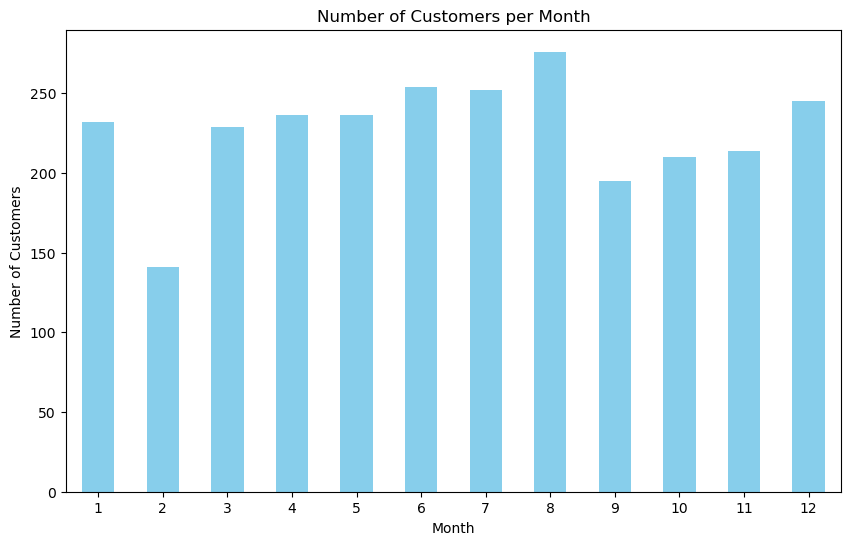

In [10]:
# Seeing customer count per month
plt.figure(figsize=(10, 6))
customer_count_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Month')
plt.xticks(rotation=0)
plt.show()

**Remark:** The sales peak in August and dip in February and is relatively higher during the summer months and relatively low around winter months.

In [11]:
# Extract the 'CustomerID' and 'Transaction_Date' columns
customer_data = merged_data[['CustomerID', 'Transaction_Date']]
# Calculate the month of the first purchase for each customer
customer_data['First_Purchase_Month'] = customer_data.groupby('CustomerID')['Transaction_Date'].transform('min').dt.strftime('%m')


C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_10508\2116620441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['First_Purchase_Month'] = customer_data.groupby('CustomerID')['Transaction_Date'].transform('min').dt.strftime('%m')


In [12]:
# Grouping customers into cohorts based on the month of their first purchase
cohorts = customer_data.groupby('First_Purchase_Month')

cohorts

In [13]:
# Creating a new DataFrame to store the calculated retention values
retention_data = cohorts['CustomerID'].nunique().reset_index()
retention_data

,First_Purchase_Month,CustomerID
0,01,232
1,02,114
2,03,166
3,04,151
4,05,119
5,06,140
6,07,100
7,08,116
8,09,77
9,10,89


In [14]:
# Renaming columns for clarity
retention_data.columns = ['Cohort_Index', 'Customer_Count']

In [15]:
# Calculating the number of active customers in each cohort for each subsequent month
retention_data['Month_Index'] = retention_data['Cohort_Index']
retention_data['Retention'] = retention_data.groupby(['Cohort_Index', 'Month_Index'])['Customer_Count'].transform('count')

In [16]:
# pivot table to display the retention matrix
retention_matrix = retention_data.pivot_table(index='Cohort_Index', columns='Month_Index', values='Retention', aggfunc='sum')
print(retention_matrix)

Month_Index    01   02   03   04   05   06   07   08   09   10   11   12
Cohort_Index                                                            
01            1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
02            NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
03            NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
04            NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
05            NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
06            NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN
07            NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN
08            NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN
09            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN
10            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN
11            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN
12            NaN  NaN  NaN  NaN  NaN  NaN  NaN  Na

**Remark:** There is 100% retention for every month which means the E-commerce site is good at retaining their customers.

In [17]:
# Defining a cutoff date to categorize customers as existing or new
cutoff_date = pd.to_datetime('2019-04-15')

In [18]:
# Categorizing customers as existing or new based on the cutoff date
merged_data['Customer_Type'] = 'Existing'
merged_data.loc[merged_data['Transaction_Date'] >= cutoff_date, 'Customer_Type'] = 'New'


In [19]:
# Grouping data by month and customer type, and calculate monthly revenue
monthly_revenue = merged_data.groupby(['Customer_Type', pd.Grouper(key='Transaction_Date', freq='M')])['Invoice_Value'].sum().unstack().fillna(0)
monthly_revenue

Transaction_Date,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31
Customer_Type,,,,,,,,,,,,
Existing,9.730033e+07,8.347481e+07,9.237639e+07,4.181908e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
New,0.000000e+00,0.000000e+00,0.000000e+00,5.406836e+07,9.137942e+07,9.139078e+07,1.030954e+08,90496099.41,9.474336e+07,9.452111e+07,1.234475e+08,1.106943e+08


In [20]:
# Converting the revenue columns to positive whole numbers
monthly_revenue[monthly_revenue.columns] = monthly_revenue[monthly_revenue.columns].applymap(abs).astype(int)


monthly_revenue = monthly_revenue.astype(int)


monthly_revenue

Transaction_Date,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31
Customer_Type,,,,,,,,,,,,
Existing,97300325,83474812,92376390,41819075,0,0,0,0,0,0,0,0
New,0,0,0,54068357,91379421,91390779,103095444,90496099,94743355,94521114,123447485,110694268


**Remark:** The revenue generated by existing customers is decreasing and the revenue by new customers is increasing. 

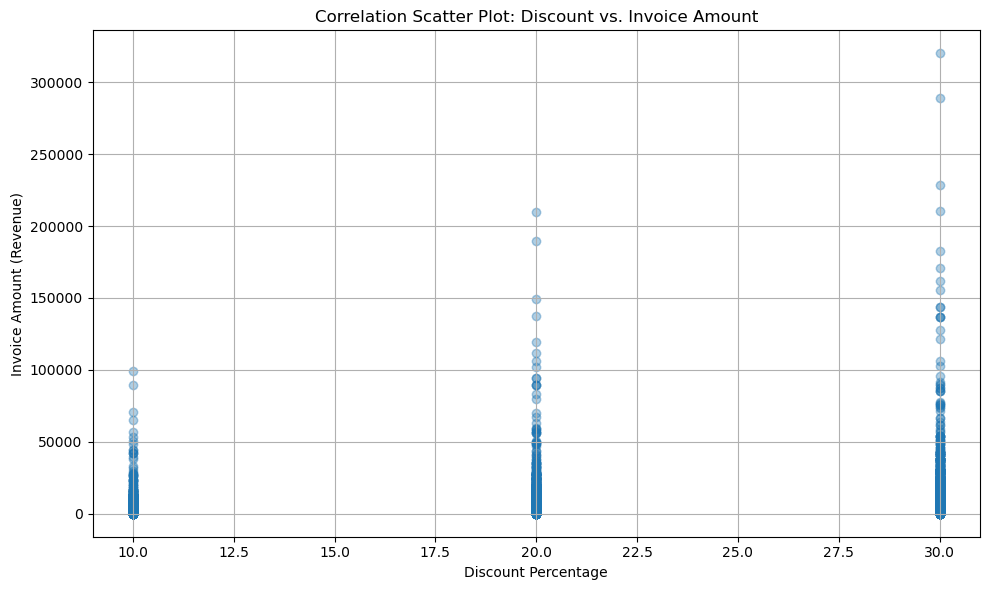

In [21]:
# Correlation between Discount and revenue
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Discount_pct'], merged_data['Invoice_Value'], alpha=0.1)
plt.xlabel('Discount Percentage')
plt.ylabel('Invoice Amount (Revenue)')
plt.title('Correlation Scatter Plot: Discount vs. Invoice Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Calculate the correlation coefficient
correlation_coefficient = merged_data['Discount_pct'].corr(merged_data['Invoice_Value'])

print(f"Correlation Coefficient between Discount Percentage and Invoice Value: {correlation_coefficient}")

Correlation Coefficient between Discount Percentage and Invoice Value: 0.21003825319434896


**Remark:** There is a mild postive correlation between Revenue and discount percentage. We can infer that if we give discounts the revenue will grow a bit more.

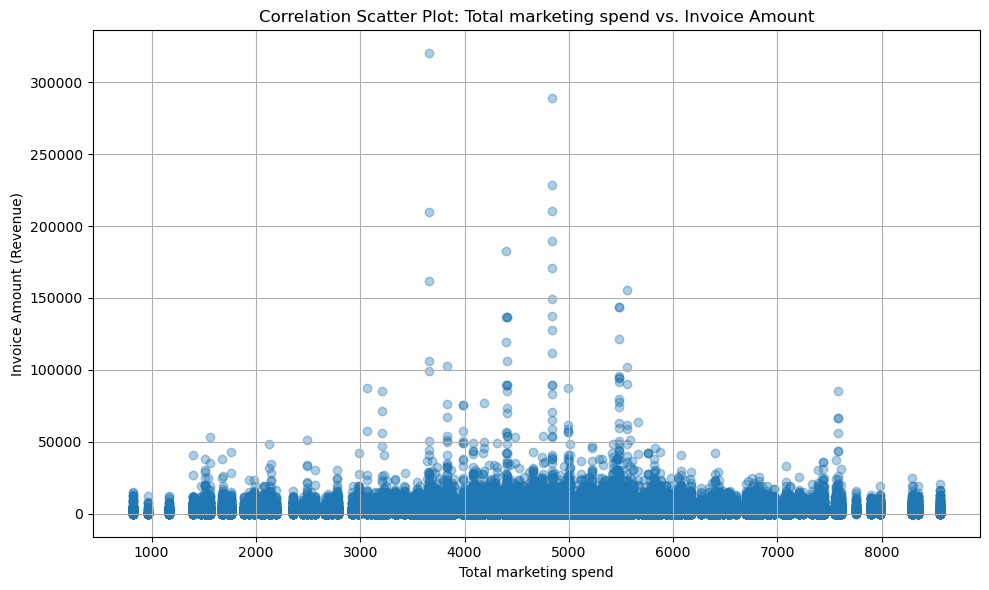

In [23]:
# Correlation between Total and revenue
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total'], merged_data['Invoice_Value'], alpha=0.1)
plt.xlabel('Total marketing spend')
plt.ylabel('Invoice Amount (Revenue)')
plt.title('Correlation Scatter Plot: Total marketing spend vs. Invoice Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Calculate the correlation coefficient
correlation_coefficient = merged_data['Total'].corr(merged_data['Invoice_Value'])

print(f"Correlation Coefficient between total marketing spend and Invoice Value: {correlation_coefficient}")

Correlation Coefficient between total marketing spend and Invoice Value: 0.04223870974339149


**Remark:** There is no correlation at all total marketing spend and revenue.

In [25]:
#top 5 products sold
product_sales = merged_data.groupby('Product_name')['Quantity'].sum()

top_products = product_sales.sort_values(ascending=False).head(5)
top_products

Product_name
Maze Pen                        194808
Google 22 oz Water Bottle       171384
Google Sunglasses               137424
Sport Bag                        87852
Google Metallic Notebook Set     77952
Name: Quantity, dtype: int64

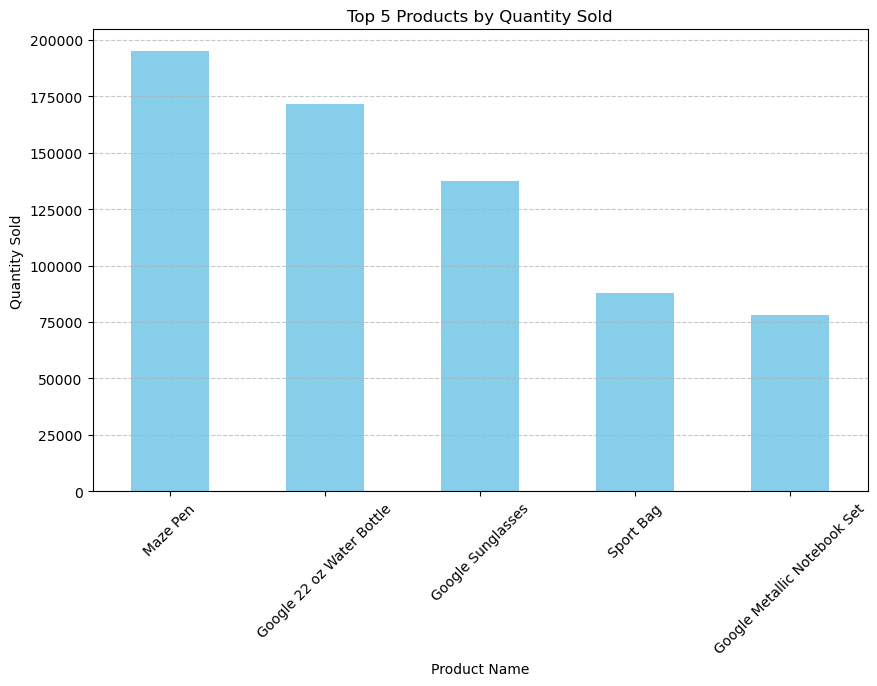

In [26]:
# Creating a bar graph
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Top 5 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Remark:** The most selling product is the Maze Pen with the highest number sold. 

In [27]:
# Top 5 products getting the most revenue
product_revenue = merged_data.groupby('Product_name')['Invoice_Value'].sum()


top_products = product_revenue.sort_values(ascending=False).head(5)
top_products.round()

Product_name
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel    172480738.0
Nest Cam Outdoor Security Camera - USA                    157706409.0
Nest Cam Indoor Security Camera - USA                     132300322.0
Nest Protect Smoke + CO White Battery Alarm-USA            53514728.0
Nest Protect Smoke + CO White Wired Alarm-USA              53204159.0
Name: Invoice_Value, dtype: float64

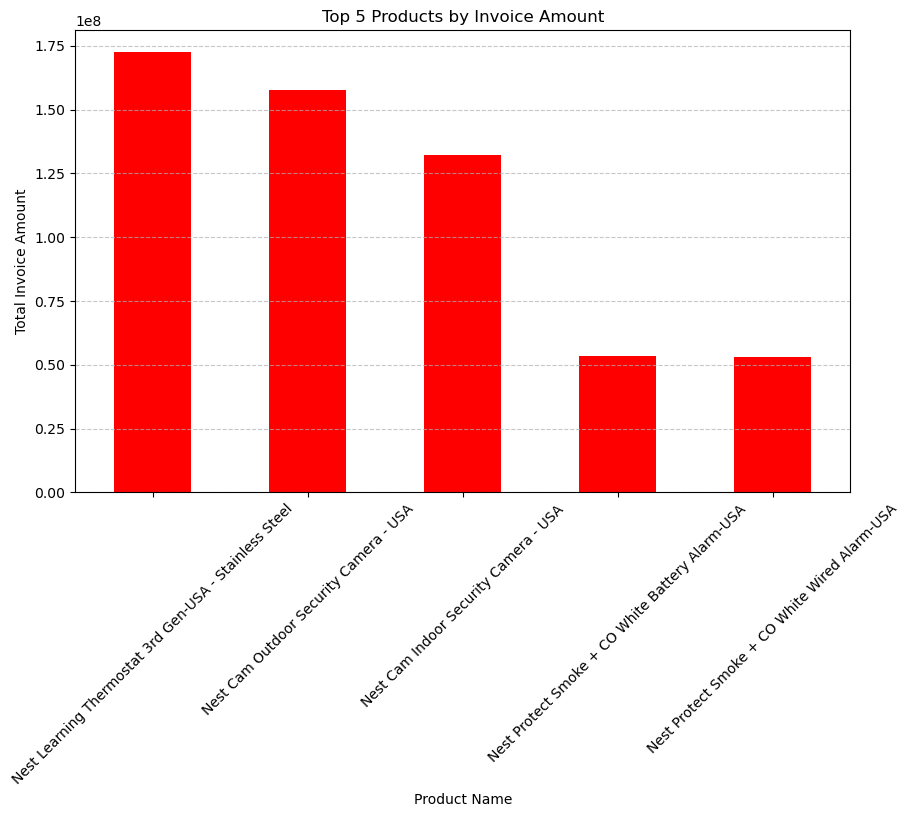

In [28]:
# Creating a bar graph
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='red')
plt.xlabel('Product Name')
plt.ylabel('Total Invoice Amount')
plt.title('Top 5 Products by Invoice Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Remark:** The products from Nest gross the most revenue for the company. 

In [31]:
# making the monthly metrics table
monthly_summary = merged_data.groupby(merged_data['Transaction_Date'].dt.strftime('%m')) \
    .agg({'Invoice_Value': 'sum', 'Total': 'sum', 'GST': 'sum', 'Delivery_Charges': 'sum'})

# Calculate the Tax as GST times Invoice_Value
monthly_summary['Tax'] = (monthly_summary['GST'] * monthly_summary['Invoice_Value'])

# Calculate the percentage of marketing spend out of revenue
monthly_summary['Marketing_Spend_Percentage'] = (monthly_summary['Total'] / monthly_summary['Invoice_Value']) * 100


# Renaming columns for clarity
monthly_summary.rename(columns={
    'Invoice_Value': 'Revenue',
    'Marketing_Spend': 'Total',
    'GST': 'GST',
    'Delivery_Charges': 'Delivery Charges'
}, inplace=True)

monthly_summary.round()

,Revenue,Total,GST,Delivery Charges,Tax,Marketing_Spend_Percentage
Transaction_Date,,,,,,
01,97300325.0,178357301.0,6714.0,634603.0,6.532471e+11,183.0
02,83474812.0,204154491.0,5907.0,560815.0,4.930807e+11,245.0
03,92376391.0,213946108.0,7542.0,651631.0,6.966898e+11,232.0
04,95887433.0,265348491.0,7065.0,490903.0,6.774620e+11,277.0
05,91379422.0,205629762.0,7192.0,477480.0,6.572008e+11,225.0
06,91390779.0,248293134.0,7497.0,512849.0,6.851219e+11,272.0
07,103095445.0,286427446.0,9485.0,655944.0,9.778974e+11,278.0
08,90496099.0,303839273.0,9050.0,580199.0,8.189951e+11,336.0
09,94743356.0,244036385.0,6749.0,525342.0,6.394419e+11,258.0


In [32]:
# Seeing the amount of quantity sold on a daily basis
merged_data['Day_of_Week'] = merged_data['Transaction_Date'].dt.dayofweek


# Group the data by 'Day_of_Week' and calculate the sum of 'Quantity' for each day
daily_summary = merged_data.groupby('Day_of_Week')['Quantity'].sum()
daily_summary


Day_of_Week
0    268376
1    251828
2    433655
3    500166
4    522700
5    441936
6    419409
Name: Quantity, dtype: int64

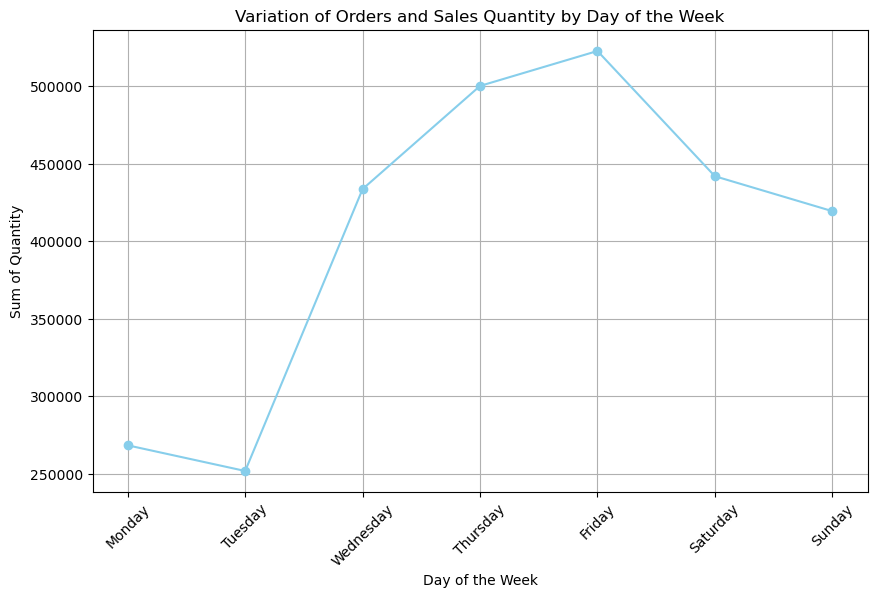

In [33]:
# Create a line chart to see total sale of quantity by day
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.figure(figsize=(10, 6))
daily_summary.index = day_names  # Assign day names to the index for labeling
daily_summary.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Sum of Quantity')
plt.title('Variation of Orders and Sales Quantity by Day of the Week')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()




**Remark:** We can see that the quantities sold are the lowest during Monday and Tuesday. There is a sharp spike on Wednesday which peaks on Friday and again dropping around the weekends. Hence we can conclude that mid week is the most busiest day for the company. 

In [34]:
# Seeing the average invoice amount per day of the week
daily_avg_invoice = merged_data.groupby('Day_of_Week')['Invoice_Value'].mean()
daily_avg_invoice

Day_of_Week
0    1769.559701
1    1860.372863
2    1860.006847
3    1962.289621
4    1905.013275
5    1797.631216
6    1790.204081
Name: Invoice_Value, dtype: float64

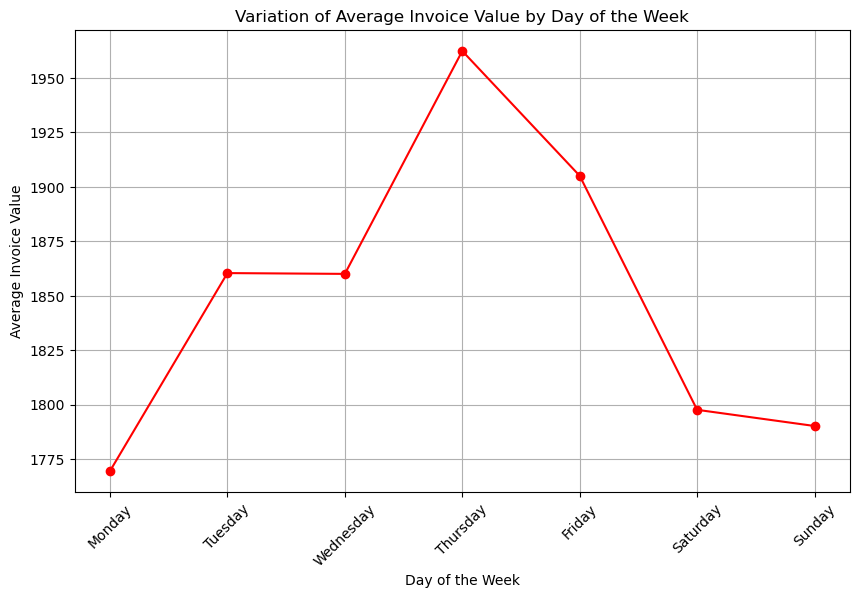

In [36]:
# Create a line chart to see average revenue per day
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.figure(figsize=(10, 6))
daily_avg_invoice.index = day_names  # Assign day names to the index for labeling
daily_avg_invoice.plot(kind='line', marker='o', color='red')
plt.xlabel('Day of the Week')
plt.ylabel('Average Invoice Value')
plt.title('Variation of Average Invoice Value by Day of the Week')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Remark:** The average of the invoice orders is the lowest on Monday and it gradually moves up during the week peaking around Thursday and gradually takes a sharp dip around the weekends. Hence the mid week is the most profitable for the company. 

In [40]:
#Seeing revenue by category and transaction date
category_revenue = merged_data.groupby(['Transaction_Date', 'Product_Category'])['Invoice_Value'].sum().unstack()
category_revenue.round()

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_Date,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,190048.0,NaN,44906.0,NaN,182378.0,0.0,NaN,NaN,59100.0,NaN,3290.0,NaN,NaN,NaN,1275913.0,48126.0,51468.0,1862.0
2019-01-02,NaN,NaN,462798.0,NaN,426699.0,NaN,65383.0,NaN,NaN,0.0,29243.0,NaN,76155.0,NaN,NaN,52062.0,2056890.0,13631.0,450003.0,NaN
2019-01-03,NaN,3932.0,494074.0,NaN,45220.0,16868.0,74321.0,NaN,NaN,0.0,8027.0,6306.0,121585.0,NaN,NaN,49805.0,2568305.0,7820.0,280597.0,12981.0
2019-01-04,NaN,NaN,169905.0,NaN,26823.0,NaN,5013.0,0.0,NaN,NaN,NaN,NaN,9376.0,NaN,NaN,NaN,1015540.0,NaN,4781.0,457.0
2019-01-05,NaN,NaN,977465.0,NaN,18692.0,21519.0,249291.0,NaN,23940.0,NaN,22258.0,3036.0,41480.0,NaN,NaN,NaN,2337629.0,2607.0,394123.0,5940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,943.0,NaN,178082.0,NaN,NaN,NaN,74187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896126.0,NaN,2201290.0,NaN,39558.0,1456.0
2019-12-28,NaN,NaN,62773.0,NaN,NaN,NaN,41236.0,NaN,NaN,NaN,3824.0,NaN,796.0,NaN,1061788.0,NaN,1533733.0,NaN,1547.0,NaN
2019-12-29,NaN,NaN,148414.0,NaN,21857.0,NaN,6855.0,NaN,24402.0,NaN,NaN,NaN,2545.0,NaN,459131.0,164938.0,2165583.0,NaN,693.0,NaN


(array([17897, 17928, 17956, 17987, 18017, 18048, 18078, 18109, 18140,
        18170, 18201, 18231, 18261], dtype=int64),
 [Text(17897, 0, 'Jan\n2019'),
  Text(17928, 0, 'Feb'),
  Text(17956, 0, 'Mar'),
  Text(17987, 0, 'Apr'),
  Text(18017, 0, 'May'),
  Text(18048, 0, 'Jun'),
  Text(18078, 0, 'Jul'),
  Text(18109, 0, 'Aug'),
  Text(18140, 0, 'Sep'),
  Text(18170, 0, 'Oct'),
  Text(18201, 0, 'Nov'),
  Text(18231, 0, 'Dec'),
  Text(18261, 0, '')])

<Figure size 2000x600 with 0 Axes>

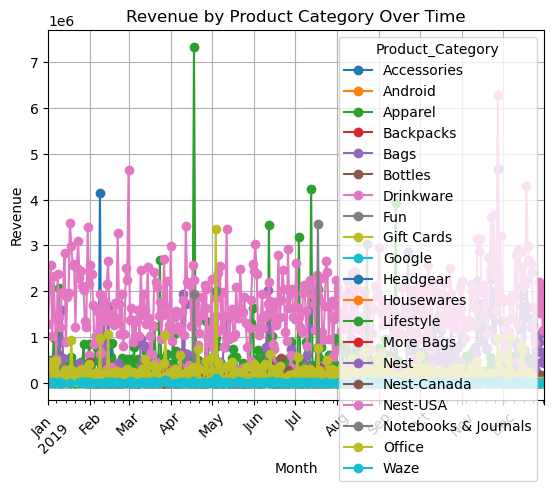

In [42]:
# Visualization by time series line chart for revenue by category
plt.figure(figsize=(20, 6))
category_revenue.plot(kind='line', marker='o', legend=True)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Product Category Over Time')
plt.grid(True)
plt.xticks(rotation=45)

In [39]:
#Seeing revenue by location and transaction date
location_revenue = merged_data.groupby(['Transaction_Date', 'Location'])['Invoice_Value'].sum().unstack()
location_revenue.round()

Location,California,Chicago,New Jersey,New York,Washington DC
Transaction_Date,,,,,
2019-01-01,294607.0,1454826.0,NaN,107658.0,NaN
2019-01-02,789359.0,1251300.0,NaN,381463.0,1210743.0
2019-01-03,1120329.0,1510273.0,540442.0,518798.0,NaN
2019-01-04,788558.0,443339.0,NaN,NaN,NaN
2019-01-05,1221188.0,2343547.0,94699.0,438545.0,NaN
...,...,...,...,...,...
2019-12-27,NaN,2144564.0,40955.0,748562.0,457561.0
2019-12-28,2006027.0,599564.0,NaN,100107.0,NaN
2019-12-29,2349274.0,645143.0,NaN,NaN,NaN


<Figure size 1200x600 with 0 Axes>

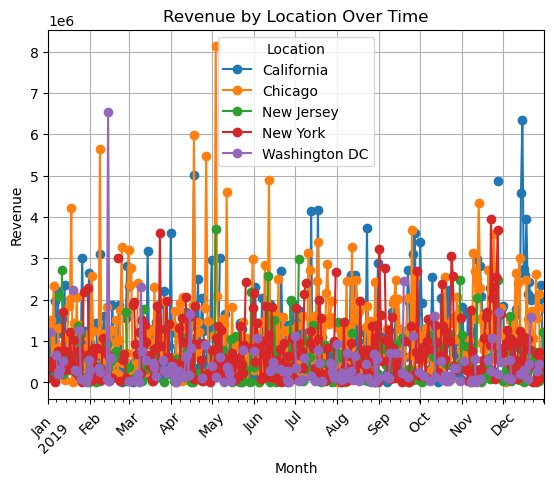

In [43]:
# Visualization by time series line chart for revenue by location
plt.figure(figsize=(12, 6))
location_revenue.plot(kind='line', marker='o', legend=True)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Location Over Time')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [44]:
# Defininga function to calculate KPIs
def calculate_kpis(df):
    revenue = df['Invoice_Value'].sum()
    num_orders = df['Transaction_ID'].nunique()
    num_customers = df['CustomerID'].nunique()
    quantity = df['Quantity'].sum()
    avg_order_value = revenue / num_orders if num_orders > 0 else 0
    return pd.Series({'Revenue': revenue,
                      'Number_of_Orders': num_orders,
                      'Number_of_Customers': num_customers,
                      'Quantity': quantity,
                      'Average_Order_Value': avg_order_value})

In [45]:
# Grouping the data 
category_kpi = merged_data.groupby('Product_Category').apply(calculate_kpis)
month_kpi = merged_data.groupby(merged_data['Transaction_Date'].dt.strftime('%Y-%m')).apply(calculate_kpis)
week_kpi = merged_data.groupby(merged_data['Transaction_Date'].dt.strftime('%Y-%U')).apply(calculate_kpis)
day_kpi = merged_data.groupby(merged_data['Transaction_Date'].dt.strftime('%Y-%m-%d')).apply(calculate_kpis)


In [50]:
# KPI tables for each product category
category_kpi_table = category_kpi.reset_index().rename(columns={'level_0': 'Product_Category'})
month_kpi_table = month_kpi.reset_index().rename(columns={'level_0': 'Month'})
week_kpi_table = week_kpi.reset_index().rename(columns={'level_0': 'Week'})
day_kpi_table = day_kpi.reset_index().rename(columns={'level_0': 'Day'})


In [54]:
# month names, week labels, and days of the week labels
month_names = pd.date_range(start='1/1/2019', periods=12, freq='M').strftime('%B')
week_labels = [f'Week {i+1}' for i in range(len(week_kpi_table))]
day_labels = merged_data['Transaction_Date'].dt.strftime('%A').unique()



In [55]:
# Replacing numeric values with labels in the tables
month_kpi_table['Month'] = month_names
week_kpi_table['Week'] = week_labels
day_kpi_table['Date'] = merged_data['Transaction_Date'].dt.strftime('%Y-%m-%d')



In [60]:
#dropping redundant columns
month_kpi_table=month_kpi_table.drop(['Transaction_Date'],axis=1)
week_kpi_table=week_kpi_table.drop(['Transaction_Date'],axis=1)
day_kpi_table=day_kpi_table.drop(['Transaction_Date'],axis=1)

In [58]:
# KPI tables by Product Category  
print("KPIs by Product Category:")
category_kpi_table.round()

KPIs by Product Category:


,Product_Category,Revenue,Number_of_Orders,Number_of_Customers,Quantity,Average_Order_Value
0,Accessories,1802040.0,191.0,150.0,13164.0,9435.0
1,Android,173926.0,43.0,42.0,540.0,4045.0
2,Apparel,156941018.0,8129.0,1323.0,389256.0,19306.0
3,Backpacks,0.0,84.0,75.0,113.0,0.0
4,Bags,40403362.0,1545.0,728.0,183276.0,26151.0
5,Bottles,1615857.0,258.0,203.0,25080.0,6263.0
6,Drinkware,53414315.0,2524.0,919.0,366012.0,21163.0
7,Fun,0.0,146.0,118.0,834.0,0.0
8,Gift Cards,4676397.0,157.0,77.0,2472.0,29786.0
9,Google,0.0,105.0,89.0,575.0,0.0


In [61]:
# KPI tables by Month
print("\nKPIs by Month:")
month_kpi_table.round()


KPIs by Month:


,Revenue,Number_of_Orders,Number_of_Customers,Quantity,Average_Order_Value,Month
0,97300325.0,2050.0,232.0,211127.0,47464.0,January
1,83474812.0,1743.0,141.0,218402.0,47891.0,February
2,92376391.0,2073.0,229.0,249455.0,44562.0,March
3,95887433.0,1988.0,236.0,250414.0,48233.0,April
4,91379422.0,1978.0,236.0,277564.0,46198.0,May
5,91390779.0,2048.0,254.0,236974.0,44624.0,June
6,103095445.0,2180.0,252.0,297135.0,47291.0,July
7,90496099.0,2234.0,276.0,274632.0,40509.0,August
8,94743356.0,1989.0,195.0,229063.0,47634.0,September
9,94521115.0,1984.0,210.0,222394.0,47642.0,October


In [62]:
# KPI tables by week
print("\nKPIs by Week:")
week_kpi_table.round()


KPIs by Week:


,Revenue,Number_of_Orders,Number_of_Customers,Quantity,Average_Order_Value,Week
0,14509673.0,333.0,34.0,35687.0,43573.0,Week 1
1,22305953.0,446.0,68.0,50229.0,50013.0,Week 2
2,22740197.0,478.0,49.0,50048.0,47574.0,Week 3
3,21866036.0,466.0,48.0,41176.0,46923.0,Week 4
4,22286645.0,469.0,69.0,43179.0,47519.0,Week 5
5,20699804.0,421.0,60.0,68448.0,49168.0,Week 6
6,25758345.0,474.0,39.0,69834.0,54343.0,Week 7
7,18052795.0,444.0,21.0,39941.0,40659.0,Week 8
8,20903515.0,445.0,32.0,47211.0,46974.0,Week 9
9,15161745.0,423.0,35.0,43497.0,35843.0,Week 10


In [63]:
# KPI tables by day
print("\nKPIs by Day:")
day_kpi_table.round()


KPIs by Day:


,Revenue,Number_of_Orders,Number_of_Customers,Quantity,Average_Order_Value,Date
0,1857091.0,41.0,7.0,4180.0,45295.0,2019-01-01
1,3632864.0,70.0,8.0,10589.0,51898.0,2019-01-01
2,3689841.0,71.0,9.0,8389.0,51970.0,2019-01-01
3,1231897.0,33.0,3.0,1165.0,37330.0,2019-01-01
4,4097980.0,118.0,7.0,11364.0,34729.0,2019-01-01
...,...,...,...,...,...,...
360,3391641.0,68.0,7.0,3336.0,49877.0,2019-01-01
361,2705698.0,52.0,5.0,1368.0,52033.0,2019-01-01
362,2994417.0,65.0,3.0,1452.0,46068.0,2019-01-01
363,1992032.0,44.0,4.0,1452.0,45273.0,2019-01-01
